In [1]:
import numpy as np
import matplotlib.pyplot as plt
from solvers import Runge_Kutta_Sistema

$$
\frac{dx}{dt} = s(y - x) \\
\frac{dy}{dt} = rx - y - xz \\
\frac{dz}{dt} = xy - bz
$$


In [7]:
def F(X, t, p):
    return np.array([p[0]*(X[1]-X[0]),
                     p[1]*X[0] - X[1] - X[0]*X[2],
                     X[0]*X[1] - p[2]*X[2]],dtype=float)


X0 = [1, 0.5, 0.1]
p = [10,82,8/3]
inter = [0,50]

sols = Runge_Kutta_Sistema(fun=F, 
                           interval=inter, 
                           X0=X0, 
                           h=0.01, 
                           p=p)

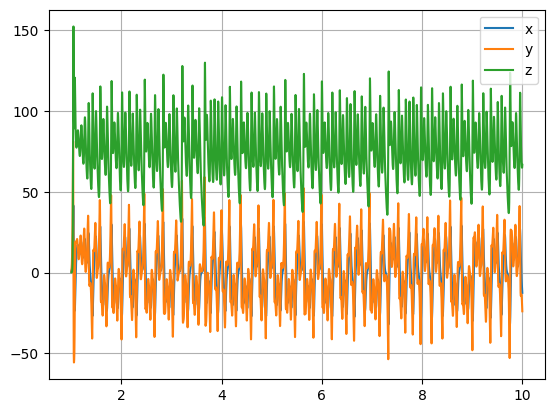

In [8]:
fig, ax = plt.subplots(1,1)
x = np.linspace(1,10,5000)
ax.plot(x, sols[:,0], label='x')
ax.plot(x, sols[:,1], label='y')
ax.plot(x, sols[:,2], label='z')
ax.grid()
ax.legend()
plt.show()

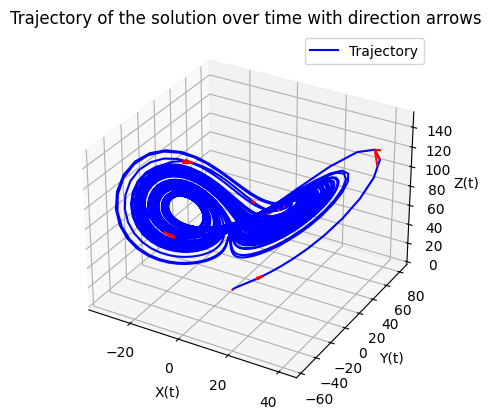

In [9]:
from mpl_toolkits.mplot3d import Axes3D
from ipywidgets import interact
import matplotlib.animation as animation

# Example data - Replace with your actual solutions
t = np.linspace(0, 10, 100)  # Time points
x = sols[:,0]
y = sols[:,1]
z = sols[:,2]

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot x(t), y(t), z(t) as a parametric curve
ax.plot(x, y, z, label='Trajectory', color='blue')

# Add arrows to indicate the direction of the solution
# Use an interval to avoid too many arrows, e.g., every 10th point
arrow_interval = 10
for i in range(0, len(t)-arrow_interval, arrow_interval):
    ax.quiver(
        x[i], y[i], z[i],  # Starting point of the arrow
        x[i+1]-x[i], y[i+1]-y[i], z[i+1]-z[i],  # Direction of the arrow
        color='red', arrow_length_ratio=0.9)  # Adjust length ratio for the arrows

# Set labels and title
ax.set_xlabel('X(t)')
ax.set_ylabel('Y(t)')
ax.set_zlabel('Z(t)')
ax.set_title('Trajectory of the solution over time with direction arrows')

plt.legend()
plt.show()
